### 1. Imports

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import torch



### 2: File paths

In [4]:
data_path = "../../data/processed/processed_bunker_sentiment.pkl"
df_sentiment = pd.read_pickle("df_with_sentiment.pkl")

### 3: Load and filter data

In [ ]:
df = pd.read_pickle(data_path, )
bunker_counts = df["bunker_name"].value_counts()
valid_bunkers = bunker_counts[bunker_counts >= 100].index
df = df[df["bunker_name"].isin(valid_bunkers)].copy()
print(f"Filtered to {len(valid_bunkers)} bunkers with >= 100 reviews")

Filtered to 6 bunkers with >= 100 reviews


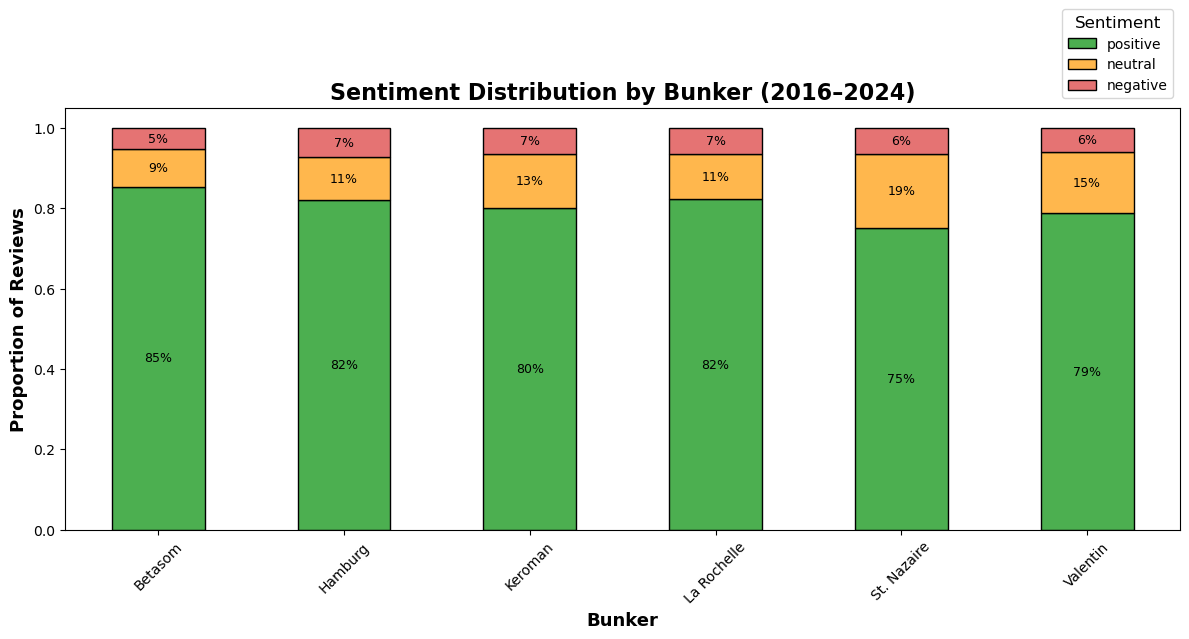

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your sentiment dataframe
df_sentiment = pd.read_pickle("df_with_sentiment.pkl")

# Step 1: Filter to years 2016–2024
df_sentiment = df_sentiment[df_sentiment["year"].between(2016, 2024)]

# Step 2: Count reviews by bunker and predicted label
sentiment_counts = (
    df_sentiment.groupby(["bunker_name", "predicted_label"])
    .size()
    .unstack(fill_value=0)
)

# Step 3: Map numeric labels to strings
sentiment_counts.columns = sentiment_counts.columns.map({
    0: "negative",
    1: "neutral",
    2: "positive"
})

# Step 4: Normalize to proportions
sentiment_props = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)

# Step 5: Reorder sentiment columns
sentiment_order = ["positive", "neutral", "negative"]
sentiment_props = sentiment_props[sentiment_order]

# Step 6: Rename bunkers
sentiment_props = sentiment_props.rename(index={
    "stnazaire": "St. Nazaire",
    "larochelle_museum": "La Rochelle",
    "keroman": "Keroman",
    "betasom": "Betasom",
    "hamburg": "Hamburg",
    "valentin": "Valentin",
})

# Step 7: Plotting
colors = {
    "positive": "#4CAF50",   # soft green
    "neutral": "#FFB74D",    # muted orange
    "negative": "#E57373"    # soft red
}

fig, ax = plt.subplots(figsize=(12, 7))  # Extra vertical space for legend

sentiment_props.plot(
    kind="bar",
    stacked=True,
    color=[colors[col] for col in sentiment_order],
    edgecolor="black",
    ax=ax
)

# Add percentage labels
for i, (index, row) in enumerate(sentiment_props.iterrows()):
    cum_height = 0
    for sentiment in sentiment_order:
        height = row[sentiment]
        if height > 0.03:
            ax.text(
                i,
                cum_height + height / 2,
                f"{height * 100:.0f}%",
                ha="center",
                va="center",
                fontsize=9,
                color="black"
            )
        cum_height += height

# Styling
ax.set_title("Sentiment Distribution by Bunker (2016–2024)", fontsize=16, fontweight="bold")
ax.set_xlabel("Bunker", fontsize=13, fontweight="bold")
ax.set_ylabel("Proportion of Reviews", fontsize=13, fontweight="bold")
ax.tick_params(axis='x', labelrotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Legend in top-right corner above the plot (outside), vertical
ax.legend(
    title="Sentiment",
    title_fontsize=12,
    fontsize=10,
    loc="upper right",
    bbox_to_anchor=(1.0, 1.25),  # X: push right, Y: raise up
    ncol=1,
    frameon=True
)

# Adjust to make room for the external legend
plt.subplots_adjust(top=1)
plt.tight_layout()
plt.show()

